In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [106]:
def read_data(filename1):
    '''
    This function reads the filename and puts the data into a dataframe.
    
    input: the name of the file
    output: a dataframe    
    '''
    
    df = pd.read_csv(filename1 + '.csv', encoding = "ISO-8859-1")
    return df

In [107]:
df = read_data('Comparisons - one sheet_06_22 (csv)')

In [108]:
df.head()

,City,BASICS,Type,Link,Legal Means,Year Enacted_up,Date Enacted,Sunlight Foundation Date Signed,Prior Versions?,Population (ACS 2012; US Census 2012 est for counties),...,How to Implement Policy,24. Create or appoint oversight authority,25. Create guidance or other binding regulations for implementation,26. Incorporate public perspectives into policy implementation,27. Set appropriately ambitious timelines for implementation,28. Create processes to ensure data quality,29. Ensure sufficient funding for implementation,30. Create or explore potential partnerships,31. Mandate future review for potential changes to this policy,adoption rate of a version of policy(total score/31*2)
0,"Washington, D.C.",NaN,US City,http://www.scribd.com/fullscreen/26442622?acce...,Administrative Memo,2006,NaN,n/a,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,"Washington, D.C.",NaN,US City,http://www.dcregs.dc.gov/Gateway/NoticeHome.as...,Mayoral Memo,2011,NaN,n/a,NaN,NaN,...,NaN,NaN,NaN,2,2,NaN,n/a,2,NaN,0.10
2,"Washington, D.C.",NaN,US City,http://dc.gov/page/transparency-open-governmen...,Executive Directive,2014,7/21/2014,n/a,2006 Admin Memo: http://www.scribd.com/fullscr...,"632,323",...,NaN,"""1) The Chief Technology Officer shall designa...",n/a,"""7) A mechanism for the public to submit feedb...","""Within 120 days of the date of this Order, th...",n/a,n/a,"""The Open Government Report will describe step...","""Open Government Report. To institutionalize a...",0.58
3,"Portland, OR",NaN,US City,http://www.portlandonline.com/shared/cfm/image...,Legislation,2009,09/30/2009,8/31/16,n/a,"603,650",...,NaN,n/a,n/a,n/a,n/a,n/a,n/a,"""Work with Travel Portland and regional partne...",n/a,0.26
4,"Memphis, TN",NaN,US City,http://www.memphistn.gov/portals/0/pdf_forms/M...,Executive Order,2009,10/17/2009,8/1/17,n/a,"655,141",...,NaN,n/a,n/a,"""The Office of the Mayor shall provide opportu...",The Order is effective within 7 days; some dat...,n/a,n/a,n/a,n/a,0.26


In [109]:
sunlight_cities = df[df["Sunlight Foundation Date Signed"] != "n/a"]

In [110]:
non_sunlight_cities = df[df["Sunlight Foundation Date Signed"] == "n/a"]

In [112]:
#analysis of years with respect to whether partner of sunlight foundation or not

In [158]:
#how much on average is sunlight partnership more effective than not having a partnership?

# Useful functions

In [156]:
def explore_analysis(column1, column2, option, df):
    '''
    This function returns three types of analysis (descriptive stats, groupby on mean, groupby on count) 
    give two columns of a dataframe.
    
    input:
        column1: the column for which we want statistics on a grouped data
        column2: the column on which grouping is performed
        
    output: 
        a dataframe with desired type of analysis    
    '''
    
    if option == 'describe':
        df_2 = df[column1].describe()
    elif option == 'groupby_mean':
        df_2 = df[column1].groupby(df[column2]).mean().reset_index()
    elif option == 'groupby_count':
        df_2 = df[column1].groupby(df[column2]).count().reset_index()
    elif option == 'grouby_max':
        df_2 = df[column1].groupby(df[column2]).max().reset_index()
    
    return df_2

In [256]:
def seaborn_chart(x_1, y_1, data_1, xlabel_1):
    '''
    This function returns a chart for two columns (x-axis and y-axis)
    '''
    
    sns.set_style("whitegrid")
    ax = plt.subplots(figsize=(20, 6))
    ax = sns.barplot(x=x_1, y=y_1, data=data_1)
    ax.set(xlabel=xlabel_1)
    sns.plt.show()

# Analysis for cities without partnerships

In [119]:
non_sunlight_filtered = non_sunlight_cities.groupby(['City', 'Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)'], as_index=False).sum().iloc[:,0:3]

In [134]:
result = non_sunlight_filtered.sort_index(by=['Year Enacted_up'], ascending=[True])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [135]:
result = result[['Year Enacted_up', 'City',"adoption rate of a version of policy(total score/31*2)"]]

In [123]:
result.head()

,Year Enacted_up,City,adoption rate of a version of policy(total score/31*2)
57,2006,"Washington, D.C.",0.00
49,2009,"San Francisco, CA",0.00
50,"2009, 2010, 2013","San Francisco, CA",0.53
51,2010,"San Francisco, CA",0.00
13,2011,"Cook County, IL",0.26


In [130]:
result_year_groupby = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted_up", "groupby_mean", result)

In [131]:
result_year_groupby["adoption rate of a version of policy(total score/31*2)"] = result_year_groupby["adoption rate of a version of policy(total score/31*2)"]*100

In [147]:
result_year_groupby

,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
0,2006,0.000000
1,2009,0.000000
2,"2009, 2010, 2013",53.000000
3,2010,0.000000
4,2011,12.500000
5,2012,31.166667
6,2013,35.357143
7,2014,36.238095
8,2015,35.000000
9,2016,25.000000


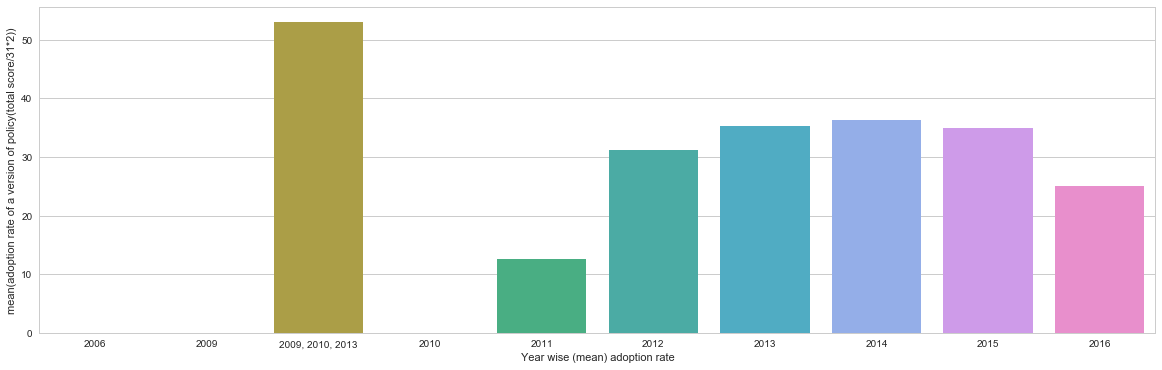

In [257]:
#visual
visual_nonsunlight_year_groupby = seaborn_chart('Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)', result_year_groupby, 'Year wise (mean) adoption rate')

# Analysis for cities with partnerships

In [137]:
sunlight_filtered = sunlight_cities.groupby(['City', 'Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)'], as_index=False).sum().iloc[:,0:3]

In [144]:
sunlight_filtered.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
0,"Anchorage, AK",2016,0.71
1,"Bloomington, IL",2014,0.23
2,"Charlotte, NC",2015,0.23
3,"Independence, MO",2015,0.45
4,"Kansas City, KS",2016,0.61


In [150]:
sunlight_result = sunlight_filtered.sort_index(by=['Year Enacted_up'], ascending=[True])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [151]:
sunlight_result = sunlight_result[['Year Enacted_up', 'City',"adoption rate of a version of policy(total score/31*2)"]]

In [152]:
sunlight_result.head()

,Year Enacted_up,City,adoption rate of a version of policy(total score/31*2)
12,2009,"Portland, OR",0.26
9,2009,"Memphis, TN",0.26
14,2012,"Raleigh, NC",0.13
13,2012,"Providence, RI",0.19
8,2012,"Madison, WI",0.40


In [153]:
sunlight_result_year_groupby = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted_up", "groupby_mean", sunlight_result)

In [154]:
sunlight_result_year_groupby["adoption rate of a version of policy(total score/31*2)"] = sunlight_result_year_groupby["adoption rate of a version of policy(total score/31*2)"]*100

In [155]:
sunlight_result_year_groupby

,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
0,2009,26.000000
1,2012,24.000000
2,2013,26.000000
3,2014,31.333333
4,2015,54.400000
5,2016,58.818182
6,2017,81.000000


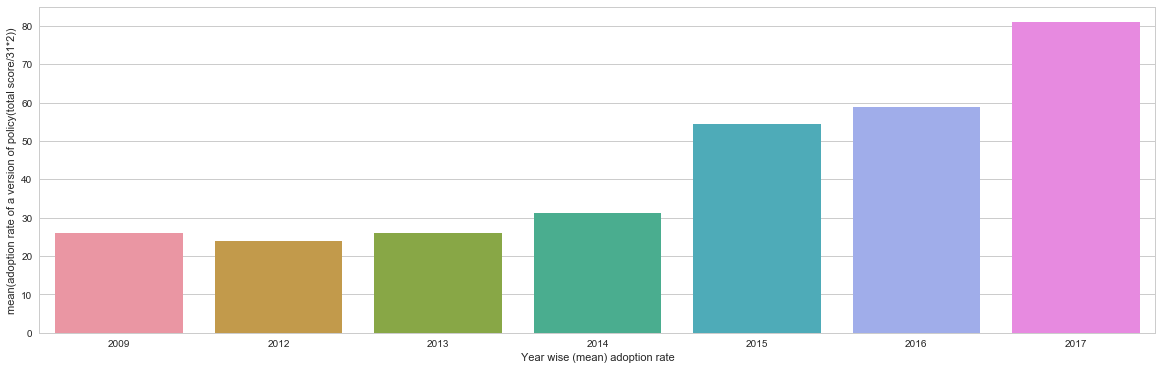

In [167]:
#visual
visual_nonsunlight_year_groupby = seaborn_chart('Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)', sunlight_result_year_groupby, 'Year wise (mean) adoption rate')

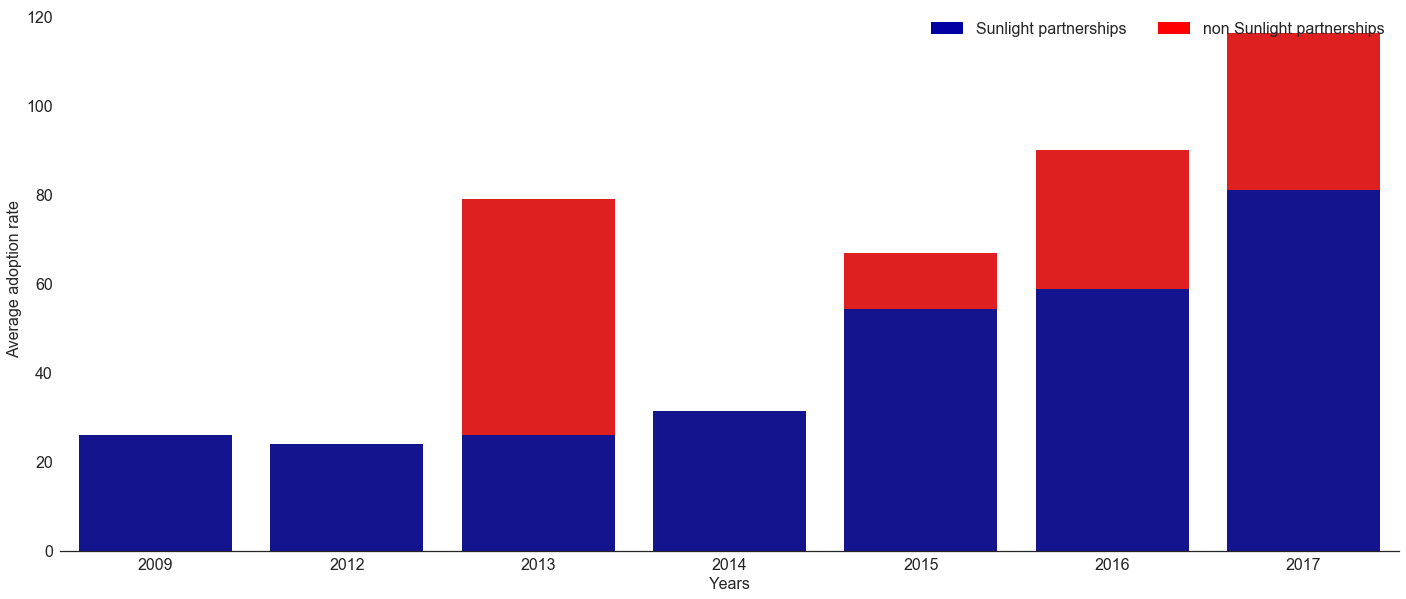

In [181]:
sunlight_result_year_groupby["total"] = sunlight_result_year_groupby['adoption rate of a version of policy(total score/31*2)'] + result_year_groupby['adoption rate of a version of policy(total score/31*2)']

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = sunlight_result_year_groupby["Year Enacted_up"], y = sunlight_result_year_groupby.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = sunlight_result_year_groupby["Year Enacted_up"], y = sunlight_result_year_groupby['adoption rate of a version of policy(total score/31*2)'], color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ["Sunlight partnerships", "non Sunlight partnerships"], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Average adoption rate")
bottom_plot.set_xlabel("Years")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [244]:
final_result = pd.concat([sunlight_result_year_groupby, result_year_groupby], axis=1)

## further analysis
-do a city wide analysis.

-number of guidelines adopted (are more cities coming on board or most guidelines per city are being registered?)

-from meeting with Greg:
1. Show adoption rate over time for _all_ cities (not split Sunlight vs. non-Sunlight)
2. _For cities that have passed multiple policies_, see if their adoption rate has increased from policy to policy
3. State vs. all others
4. State adoption average vs. city adoption average